In [41]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import gin
from DataUtils.Getdata import GetDataSets
from DataUtils.Getdata import ModuleTest
from Models.LineairModelCollection import CNN
import Models.LineairModelCollection

print(torch.version.cuda)
gin.enter_interactive_mode()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
11.3


In [42]:
gin.parse_config_file("config.gin")

In [43]:
# testing gin
from Models.LineairModelCollection import TestGin
TestGin()

PLEASE DO SOMETHING ELSE!!!!!!!!


In [44]:
ModuleTest()

Wat doet python als we iets veranderen?!?!?!


In [45]:
torch.cuda.is_available()

True

In [46]:

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

In [47]:
batch_size=64
train_dataloader,test_dataloader = GetDataSets(batch_size, device)

In [48]:
train_dataloader.dataset
type(train_dataloader.dataset)

torchvision.datasets.mnist.FashionMNIST

In [49]:
from Models.LineairModelCollection import CNN  
model = CNN().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()
 
#RunTrainer(model=model, 
#           train_dataloader=train_dataloader,
#           test_dataloader=test_dataloader,
#           learning_rate=globaLlr,
#           epochs=globalEpochs,
#           optimizer=adamOpt,
#           loss_fn=lossCross,
#           eval_steps=3,
#           device=device,
#           )

CNN(
  (convolutions): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


CrossEntropyLoss()

In [50]:
X, y = next(iter(train_dataloader))
X.shape, y.shape

flat = nn.Flatten()
z = flat(X)
z.shape

torch.Size([64, 784])

In [51]:
img = X[0]
img.shape

torch.Size([1, 28, 28])

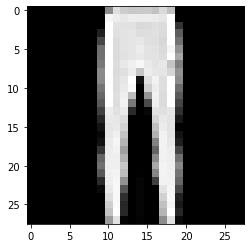

In [52]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")

In [64]:

conv2d1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
conv2d2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)

maxp = nn.MaxPool2d(kernel_size=2)
z = conv2d1(X)
z.shape
z = maxp(z)
print(z.shape)
z = conv2d2(z)
print(z.shape)

z2 = flat(z)
print(z2.shape)

torch.Size([64, 32, 14, 14])
torch.Size([64, 64, 7, 7])
torch.Size([64, 3136])


In [54]:
globaLlr = 0.02
globalEpochs = 50
globalsteps = 5

In [63]:
from Models.ConvolutionalModelCollection import BRBConvolutionalHigh  

model = BRBConvolutionalHigh().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBConvolutionalHigh\\'
          )

2022-05-19 14:23:31.665 | INFO     | Training.trainer:clean_dir:24 - Clean out ..\trained_models\BRBConvolutionalHigh\20220519-1423
2022-05-19 14:23:31.667 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBConvolutionalHigh\20220519-1423


BRBConvolutionalHigh(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=576, out_features=784, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=784, bias=True)
    (4): ReLU()
    (5): Linear(in_features=784, out_features=784, bias=True)
    (6): ReLU()
    (7): Linear(in_features=784, out_features=784, bias=True)
    (8): ReLU()
    (9): Linear(in_features=784, out_features=392, bias=True)
    (10): ReLU()
    (11): Linear(in_features=392, out_features=10, bias=True)
  )
  (classifier): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
  )
)
..\trained_models\BRBConvolutionalHigh
Epoch : 0 - train loss =0.03598271103302638
testloss :0.03594369192918142 -  test accuracy :0.1354166716337204
Epoch :

In [1]:
from Models.ConvolutionalModelCollection import BRBConvolutionalLayers  

model = BRBConvolutionalLayers().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

outpmodel = RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBConvolutionalLayer\\'
          )

d:\Development tools\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'device' is not defined

In [71]:
from Models.ConvolutionalModelCollection import BRBConvolutionalLayersDropout  
model = BRBConvolutionalLayersDropout().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=50,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBConvolutionalLayersDropout\\'
          )

2022-05-19 16:31:51.822 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBConvolutionalLayersDropout\20220519-1631


BRBConvolutionalLayersDropout(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=1568, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1568, out_features=600, bias=True)
    (4): ReLU()
    (5): Linear(in_features=600, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=10, bias=True)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
)
..\trained_models\BRBConvolutionalLayersDropout
Epoch : 0 - train loss =0.019342727250854175
testloss :0.014083946434160074 -  test accuracy :0.6614583730697632
Epoch : 1 - train loss =0.01059025936971108
testloss :0.012194495337704817 -  test accuracy :0.71875
Epoc